# Pymaceuticals Inc.
---

### Analysis

• Capomulin and Ramicane reduces the tumor size better.

• There is a positive correlation between mouse weight and average tumor volume, it is 0.84. As the mouse weight increases, the average tumor volume increases too.

• The bar graph shows that Capomulin and Ramicane had the most number of mice tested.
 

In [206]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df=pd.merge(study_results_df,mouse_metadata_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [207]:
# Checking the number of mice.

mice_count=mouse_metadata_df["Mouse ID"].nunique()
mice_count

249

In [208]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids=merge_df[merge_df.duplicated()]

# Plot duplicate entries
duplicate_ids["Mouse ID"].values

array(['g989'], dtype=object)

In [209]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id=merge_df[merge_df["Mouse ID"]=="g989"]
#dup_mouse_id


In [210]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df=merge_df[merge_df["Mouse ID"]!="g989"]
#clean_data_df.head()

In [211]:
# Checking the number of mice in the clean DataFrame.
mice_count=clean_data_df["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [212]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Tumor_mean=clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Tumor_median=clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Tumor_variance=clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Tumor_std_dev=clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Tumor_std_err=clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [213]:

# Assemble the resulting series into a single summary DataFrame.
pharma_df=pd.DataFrame({   
            "Mean Tumor Volume":Tumor_mean,
            "Median Tumor Volume":Tumor_median,
            "Tumor Volume Variance":Tumor_variance,
             "Tumor Volume Std. Dev.":Tumor_std_dev,
            "Tumor Volume Std. Err.":Tumor_std_err})
#pharma_df

In [214]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics.columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"], summary_statistics.columns])
#summary_statistics


## Bar and Pie Charts

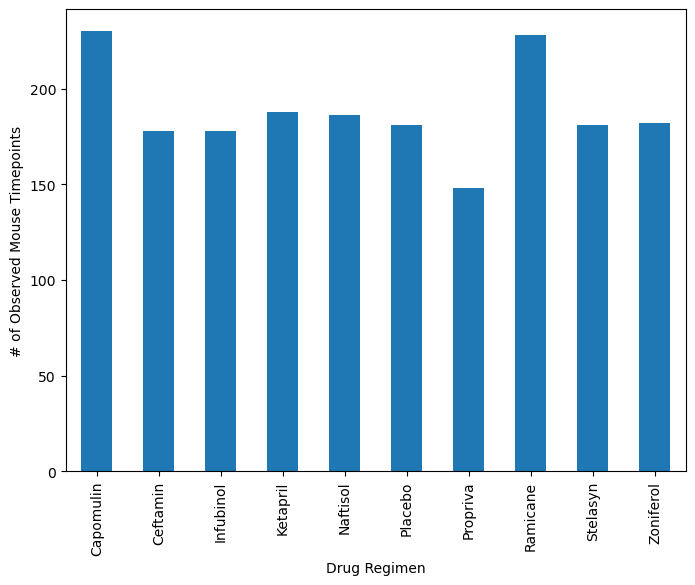

In [215]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

Drug_Regimen=["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"]
regimen_count=clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()

# Generate a bar plot using Pandas
regimen_count.plot(kind="bar", figsize=(8,6))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


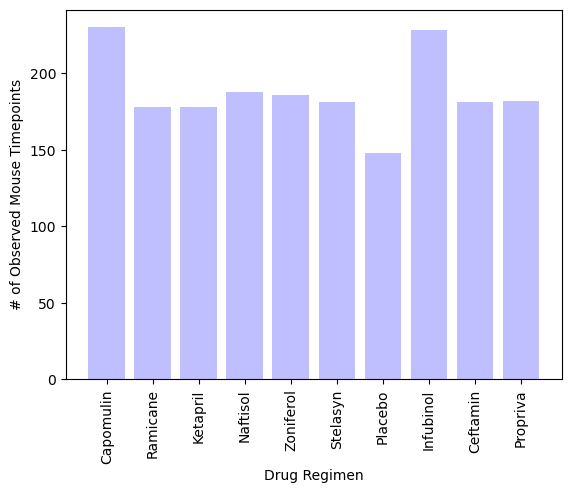

In [216]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(0, len(count))
tick_locations =[]
for x in Drug_Regimen:
    tick_locations.append(x)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Finish the plot
plt.bar(Drug_Regimen,count,color="blue",alpha=0.25,align="center")
plt.xticks(tick_locations,Drug_Regimen,rotation="vertical")
plt.show()

In [217]:
gender_counts=clean_data_df["Sex"].value_counts()
gender_counts

Sex
Male      958
Female    922
Name: count, dtype: int64

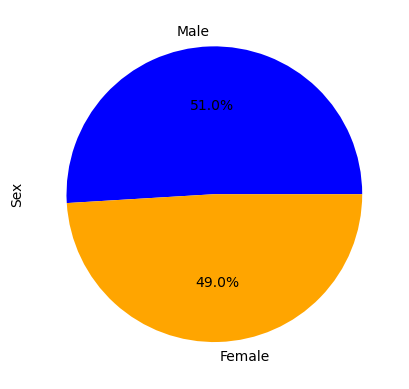

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Generate a bar plot using Pandas
gender_counts=clean_data_df["Sex"].value_counts()
gender_counts.plot(kind="pie",autopct="%1.1f%%",colors=["blue","orange"])
plt.ylabel("Sex")
plt.show()



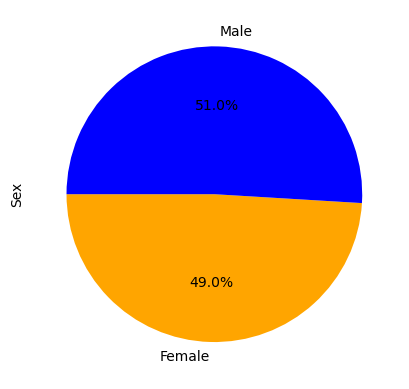

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts=clean_data_df["Sex"].value_counts().sort_index()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, colors=["orange","blue"])
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

target_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = clean_data_df[clean_data_df["Drug Regimen"].isin(target_regimens)]

# Group data by 'Mouse ID' and get the final tumor volume for each mouse
final_tumor_volume = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].last()

# Print the final tumor volume for each mouse
print(final_tumor_volume)


Drug Regimen
Capomulin    31.023923
Ceftamin     61.433892
Infubinol    60.918767
Ramicane     33.562402
Name: Tumor Volume (mm3), dtype: float64


In [221]:
# check_tumor = clean_data_df[clean_data_df["Drug Regimen"]=="Capomulin"].sort_index()
# check_tumor.tail()
# check_tumor = clean_data_df[clean_data_df["Drug Regimen"]=="Ceftamin"].sort_index()
# check_tumor.tail()
# check_tumor = clean_data_df[clean_data_df["Drug Regimen"]=="Infubinol"].sort_index()
# check_tumor.tail()
# check_tumor = clean_data_df[clean_data_df["Drug Regimen"]=="Ramicane"].sort_index()
# check_tumor.tail()

In [222]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
#last_timepoints.head()

In [223]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, clean_data_df, on=["Mouse ID","Timepoint"],how="left")
#merged_data.head()

In [224]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin"," Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
outliers={}

# Example usage in a for loop
for treatment in treatments:
    tumor_volumes = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    q1 = tumor_volumes.quantile(0.25)
    q3 = tumor_volumes.quantile(0.75)
    iqr = q3 - q1

    # Calculate lower and upper bounds for potential outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Identify potential outliers for the current treatment regimen
    potential_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    outliers[treatment] = potential_outliers
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment, potential_outliers in outliers.items():
    print(f"{treatment}'s Potential outliers: {potential_outliers}")
    
    

Capomulin's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


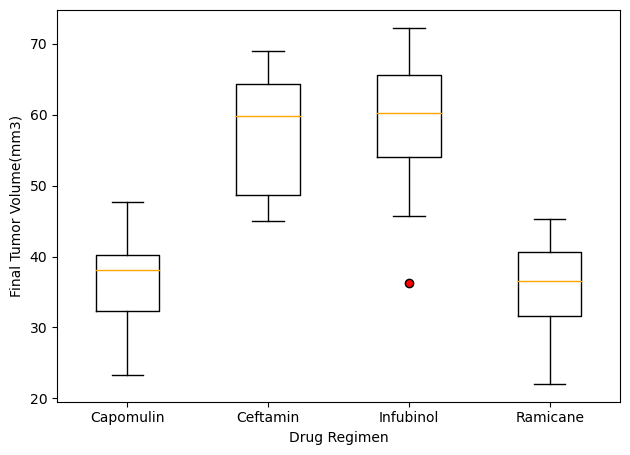

In [225]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

merged_data.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen",grid=False,showfliers=True,boxprops={'color': 'black'},whiskerprops={'color': 'black'},medianprops={'color': 'orange'},flierprops={'marker':'o','markerfacecolor':'red'})
plt.suptitle("")
plt.title("")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume(mm3)")
plt.tight_layout()

## Line and Scatter Plots

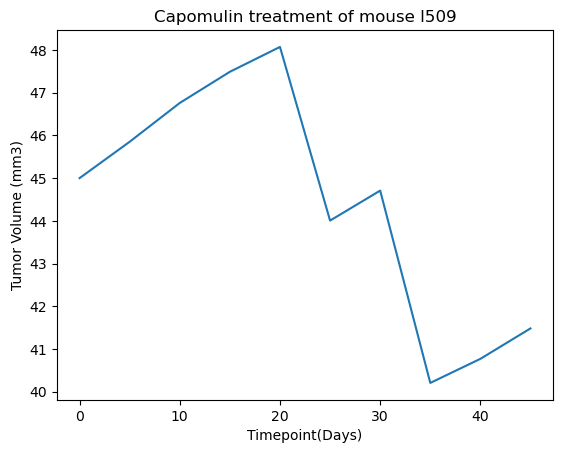

In [226]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data=clean_data_df[clean_data_df["Mouse ID"]=="l509"]

x_axis=capomulin_data["Timepoint"]
y_axis=capomulin_data["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


In [227]:
capomulin_drug=clean_data_df[clean_data_df["Drug Regimen"]=="Capomulin"]
#capomulin_drug.head()

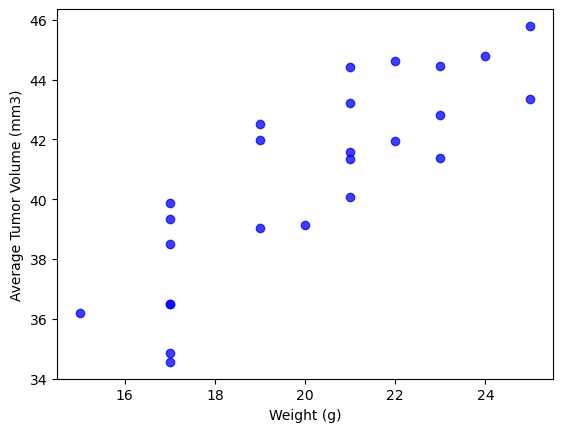

In [228]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Avg_tumor=capomulin_drug.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
#Avg_tumor

mouse_weight=capomulin_drug.groupby(["Mouse ID"])["Weight (g)"].mean()
#mouse_weight

plt.scatter(x=mouse_weight,y=Avg_tumor,color='b',marker='o',alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
Linear Regression Equation: y = 0.95x + 21.55


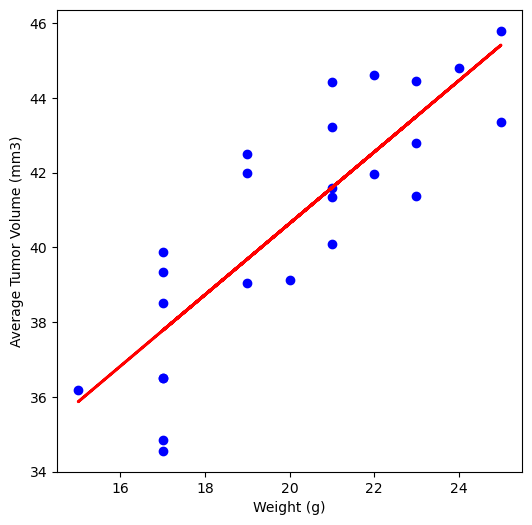

In [229]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for the Capomulin regimen
capomulin_data = merged_data[merged_data["Drug Regimen"] == "Capomulin"]

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient, _ = pearsonr(mouse_weight, Avg_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Prepare the data for linear regression
X = mouse_weight.values.reshape(-1, 1)  
y = Avg_tumor.values.reshape(-1, 1)  

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients (slope and intercept)
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

# Generate predictions using the linear regression model
predictions = model.predict(X)

# Plot the linear regression line and data points
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue')
plt.plot(X,predictions, color='red', linewidth=2)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()